# Decision Tree

In [68]:
from __future__ import division,print_function,unicode_literals

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


PROJECT_DIR = "."
np.random.seed(42)


## Training and visualizing 

In [69]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from os import system

iris = load_iris()
print(iris.feature_names)

X = iris.data[:,2:]
y = iris.target

dt_clf = DecisionTreeClassifier(max_depth=2, random_state= 42)
dt_clf.fit(X,y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [70]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file='tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True)

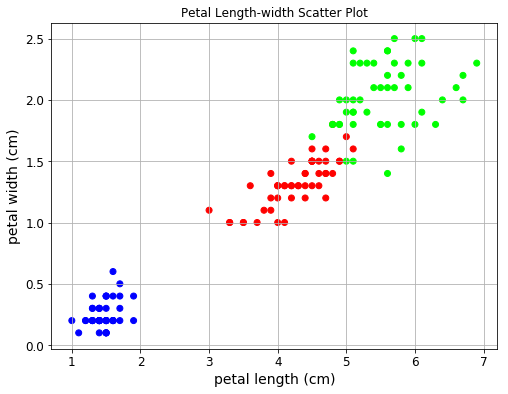

In [71]:
figure = plt.figure(figsize=(8,6));
plt.scatter(x=X[:,0],y = X[:,1],c= y,cmap=plt.cm.brg);
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal Length-width Scatter Plot')
plt.grid()

In [72]:
dt_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [73]:
iris.target_names[np.argmax(dt_clf.predict_proba([[5,1.5]]))]

'versicolor'

In [74]:
iris.target_names[dt_clf.predict([[5,1.5]])]

array(['versicolor'], dtype='<U10')

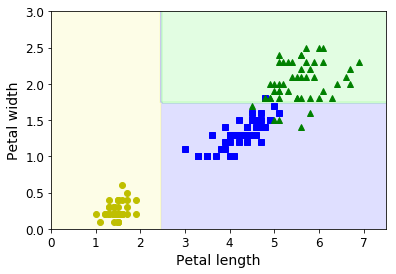

In [75]:
from matplotlib.colors import  ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        plt.axis(axes)

plot_decision_boundary(dt_clf, X,y)

In [76]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

In [77]:
print('Feature 1 Min :{:.2}'.format(Xm[:,0].min())) # -1.3810181771014063
print('Feature 1 Max :{:.2}'.format(Xm[:,0].max())) # 2.6344498865414523
print('Feature 2 Min :{:.2}'.format(Xm[:,1].min()))
print('Feature 2 Max :{:.2}'.format(Xm[:,1].max())) #1.2877690043897854

Feature 1 Min :-1.4
Feature 1 Max :2.6
Feature 2 Min :-0.84
Feature 2 Max :1.3


In [78]:
print ('Target Variables {}'.format(np.unique(ym)))

Target Variables [0 1]


In [79]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf.fit(Xm,ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

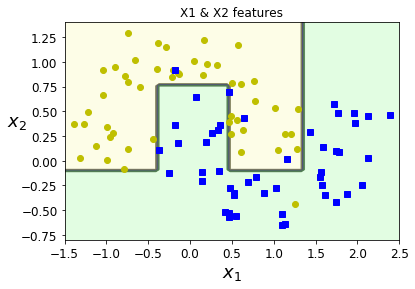

In [80]:
plot_decision_boundary(tree_clf,Xm,ym, axes = [-1.5,2.5,-0.8,1.4],iris=False,plot_training=True)
plt.title('X1 & X2 features');

In [81]:
Xi = iris.data
yi = iris.target
tree_iris_clf = DecisionTreeClassifier(random_state=42)
tree_iris_clf.fit(Xi,yi)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [82]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree1.png', '-Gdpi=200']);

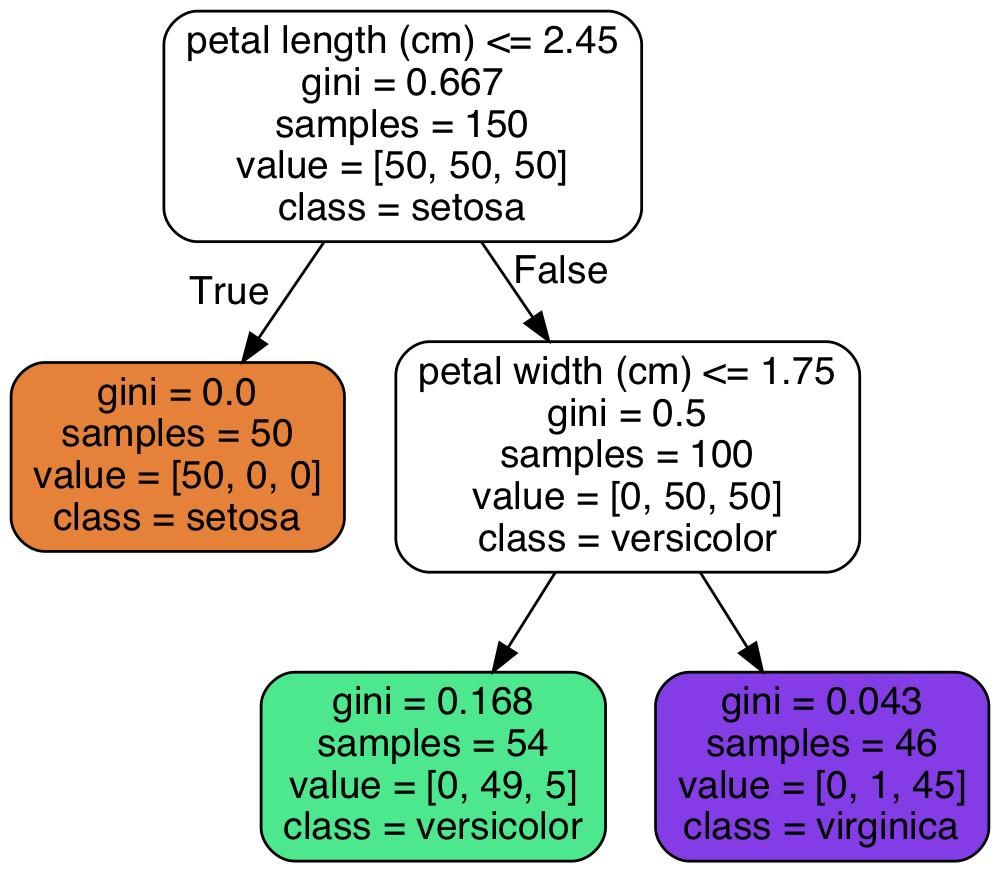

In [83]:
from IPython.display import Image
Image('tree1.png',width=400,height=200)

In [84]:
export_graphviz(tree_iris_clf,out_file='iris_tree.dot',feature_names=iris.feature_names,class_names=iris.target_names,rounded=True,precision=3)

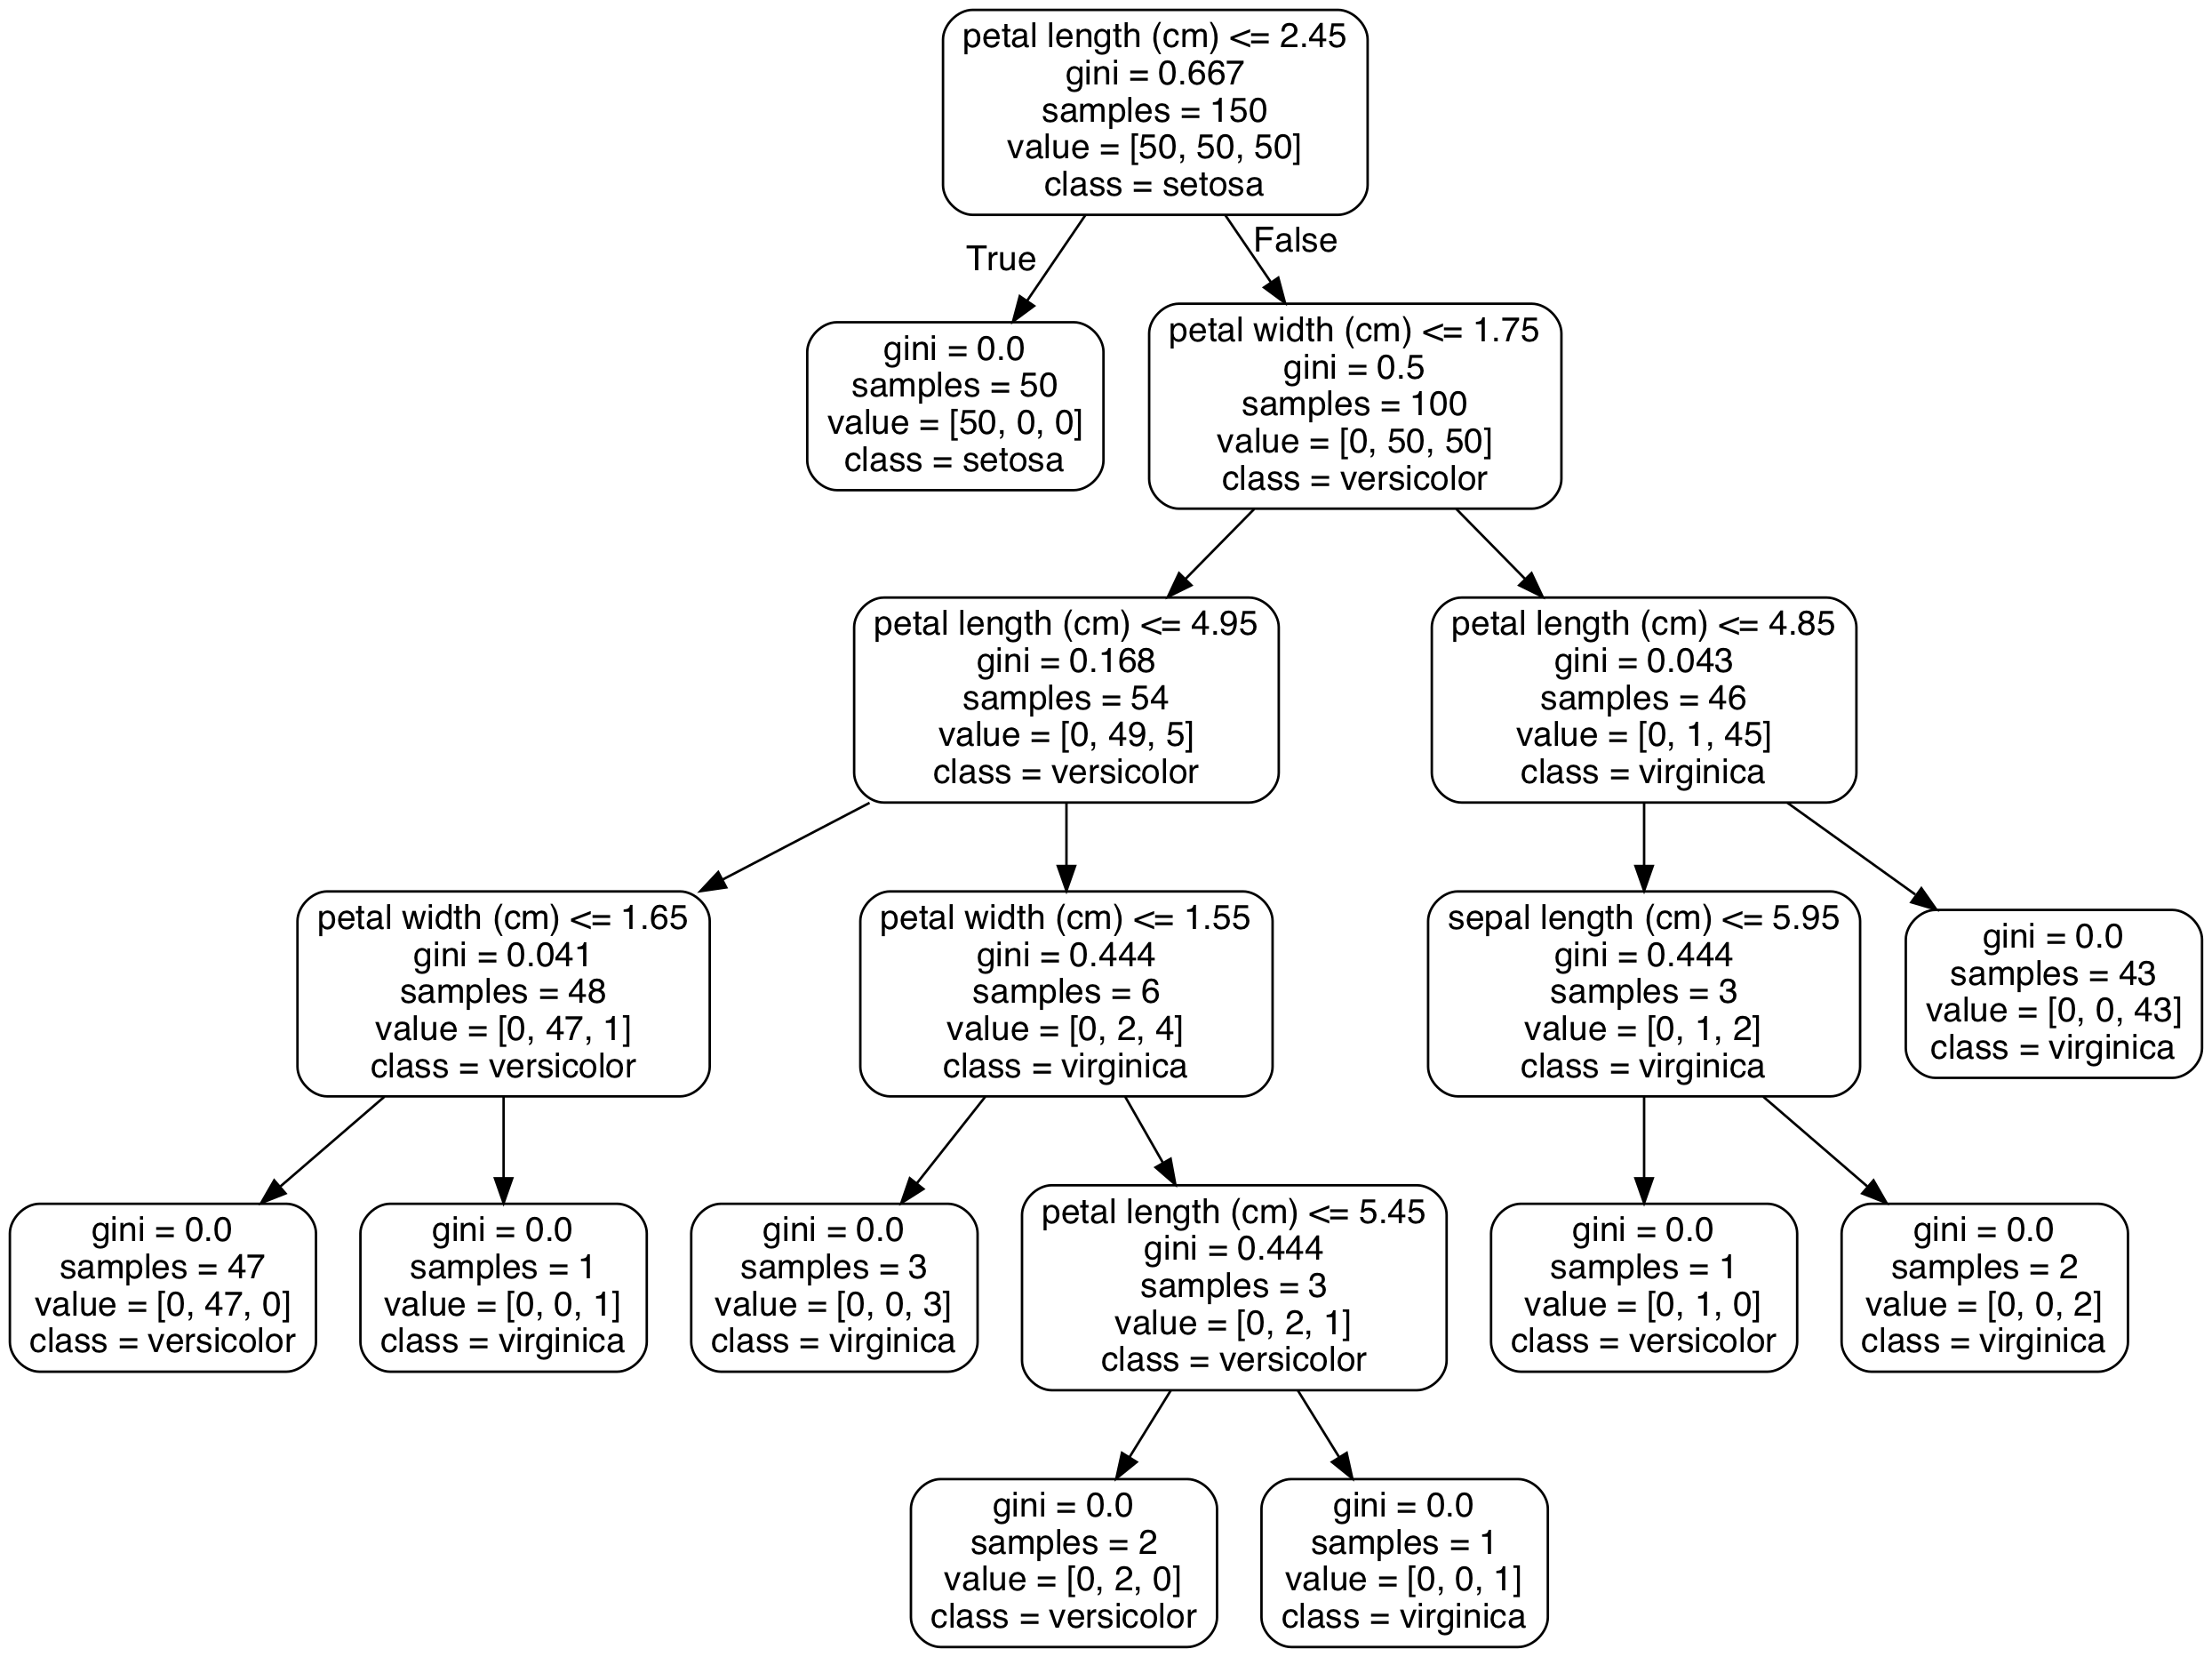

In [85]:
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=200']);
Image('iris_tree.png',width=600,height=200)

Sepal Length and Sepal Width are not making any contribution in prodiction hence removing them would not affect much on classification accuracy and it will imporve the performance of the model as decision tree complexity directly related to the number of features.

In [86]:
# Lets compare the accuracy for both the models
print('Full features Model Score :{:.3}'.format(tree_iris_clf.score(Xi,yi)))
print('Partial features(Petal Length and Width) Model Score :{:.3}'.format(dt_clf.score(X,y)))

Full features Model Score :1.0
Partial features(Petal Length and Width) Model Score :0.96


In [87]:
# let include Sepal Length

X3 = np.delete(iris.data,[1], axis = 1)
X3_features = np.delete(iris.feature_names,[1])
y =  iris.target
tree_iris_clf_3 = DecisionTreeClassifier(random_state=42)
tree_iris_clf_3.fit(X3,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [88]:
print('Partial features(excluding "sepal width (cm)") Model Score :{:.3}'.format(tree_iris_clf_3.score(X3,y)))

Partial features(excluding "sepal width (cm)") Model Score :1.0


In [89]:
# Instead of default criterion gini, lets try entropy
tree_iris_entropy_clf_3 = DecisionTreeClassifier(random_state=42,criterion='entropy')
tree_iris_entropy_clf_3.fit(X3,y)
print('Partial features(excluding "sepal width (cm)") Model Score(entropy) :{:.3}'.format(tree_iris_entropy_clf_3.score(X3,y)))

Partial features(excluding "sepal width (cm)") Model Score(entropy) :1.0


In [90]:
# compare tree struncture for criterion value gini and entropy
# gini decision tree
export_graphviz(
    tree_iris_clf_3,
    out_file='tree_iris_clf_3.dot',
    feature_names=X3_features,
    class_names=iris.target_names,
    rounded=True,
    precision=3)

#entropy decision tree
export_graphviz(
    tree_iris_entropy_clf_3,
    out_file='tree_iris_entropy_clf_3.dot',
    feature_names=X3_features,
    class_names=iris.target_names,
    rounded=True,
    precision=3)

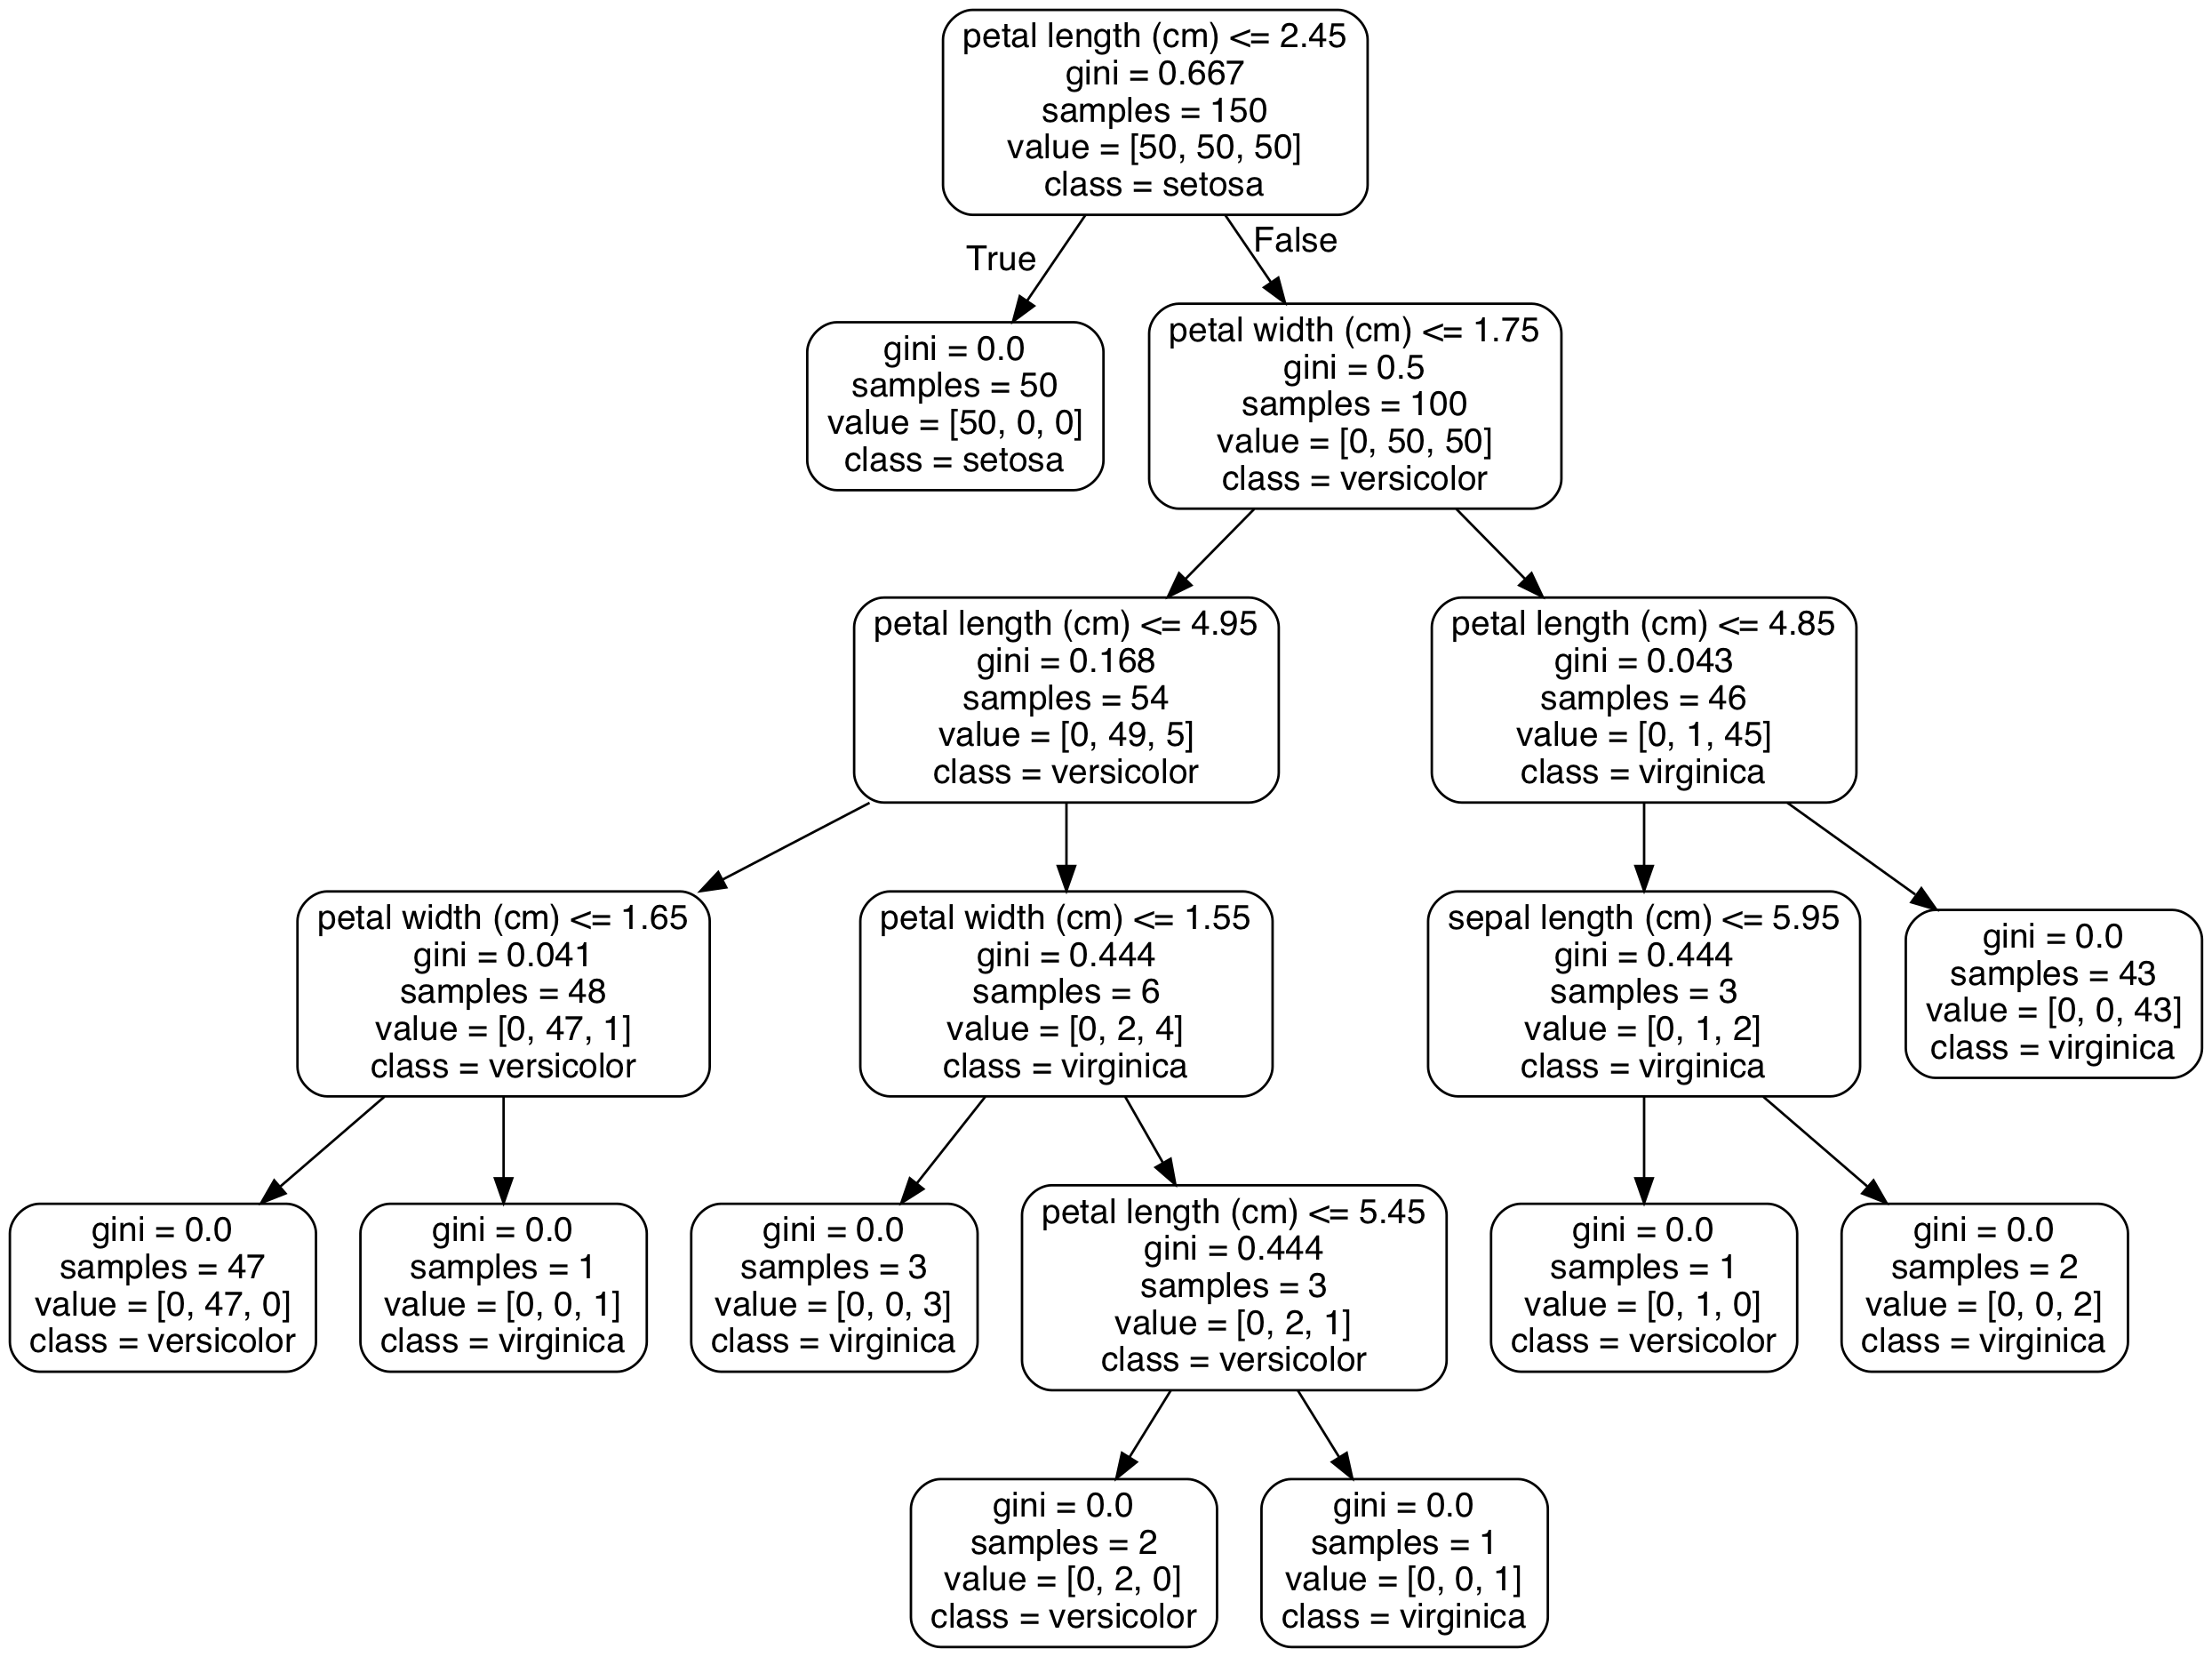

In [91]:
call(['dot', '-Tpng', 'tree_iris_clf_3.dot', '-o', 'tree_iris_clf_3.png', '-Gdpi=200']);
Image('tree_iris_clf_3.png',width=600,height=200)

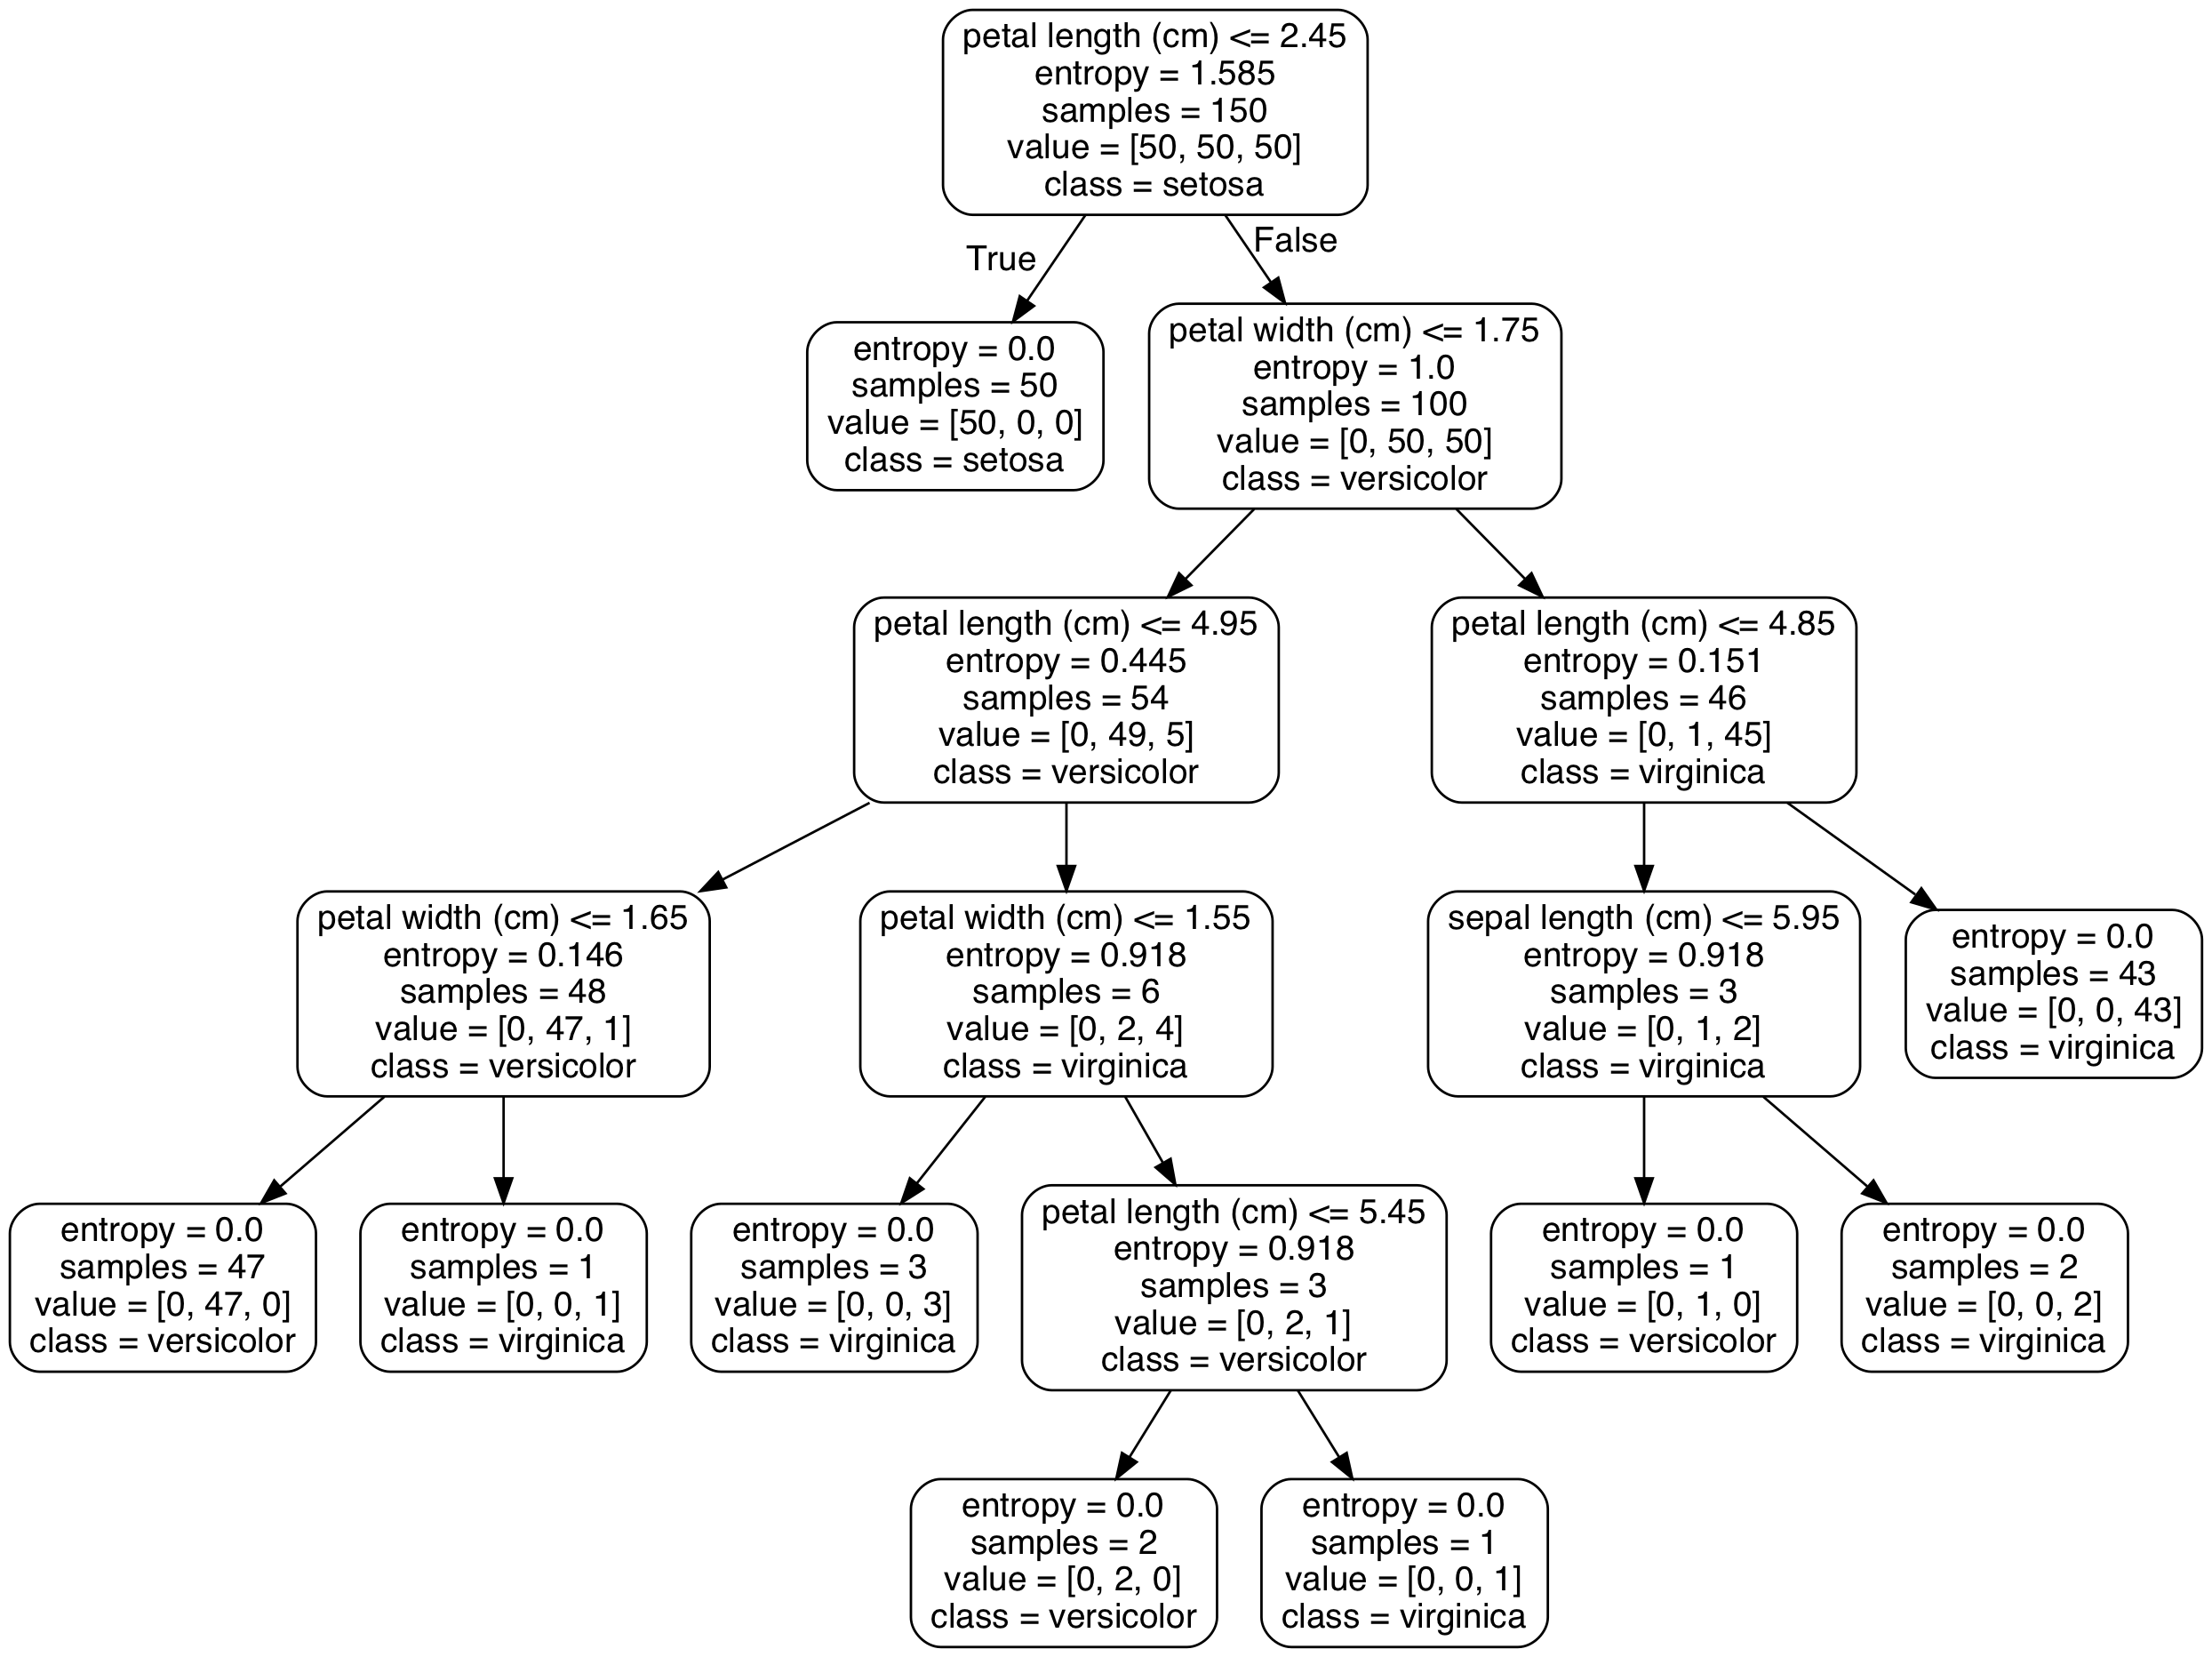

In [92]:
call(['dot', '-Tpng', 'tree_iris_entropy_clf_3.dot', '-o', 'tree_iris_entropy_clf_3.png', '-Gdpi=200']);
Image('tree_iris_entropy_clf_3.png',width=600,height=200)

There is no difference in gini and entropy decision tree. Normally entropy provides balance tree while gini is faster to compute the impurity.

#### Exercise: train and fine-tune a Decision Tree for the moons dataset.

a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

In [93]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=10000, noise=0.4,random_state=42)

b. Split it into a training set and a test set using train_test_split().

In [94]:
from sklearn.model_selection import train_test_split


In [95]:
X_moon_train,X_moon_test, y_moon_train, y_moon_test =  train_test_split(
    X_moon, y_moon,test_size = 0.2,random_state=42)

In [96]:
print('Training set shape :{}'.format(X_moon_train.shape))
print('Test set shape :{}'.format(X_moon_test.shape))

Training set shape :(8000, 2)
Test set shape :(2000, 2)


Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier.

In [97]:
from sklearn.model_selection import GridSearchCV
DecisionTreeClassifier()
params = {'min_samples_split': [2, 3, 4],'max_leaf_nodes':list(range(2,100)),'criterion':['gini','entropy']}
moon_gridsearch_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid = params, n_jobs=1, verbose=1)
moon_gridsearch_cv.fit(X_moon_train,y_moon_train)

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


[Parallel(n_jobs=1)]: Done 1764 out of 1764 | elapsed:   16.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_

In [98]:
moon_gridsearch_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set.

In [99]:
tree_moon = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
tree_moon.fit(X_moon_train,y_moon_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [100]:
from sklearn.metrics import accuracy_score

print('Trainig set accuracy : {}'.format(accuracy_score(y_moon_train, tree_moon.predict(X_moon_train))))
print('Test set accuracy : {}'.format(accuracy_score(y_moon_test, tree_moon.predict(X_moon_test))))

Trainig set accuracy : 0.862875
Test set accuracy : 0.8695


Training and test set have almost same accuracy.

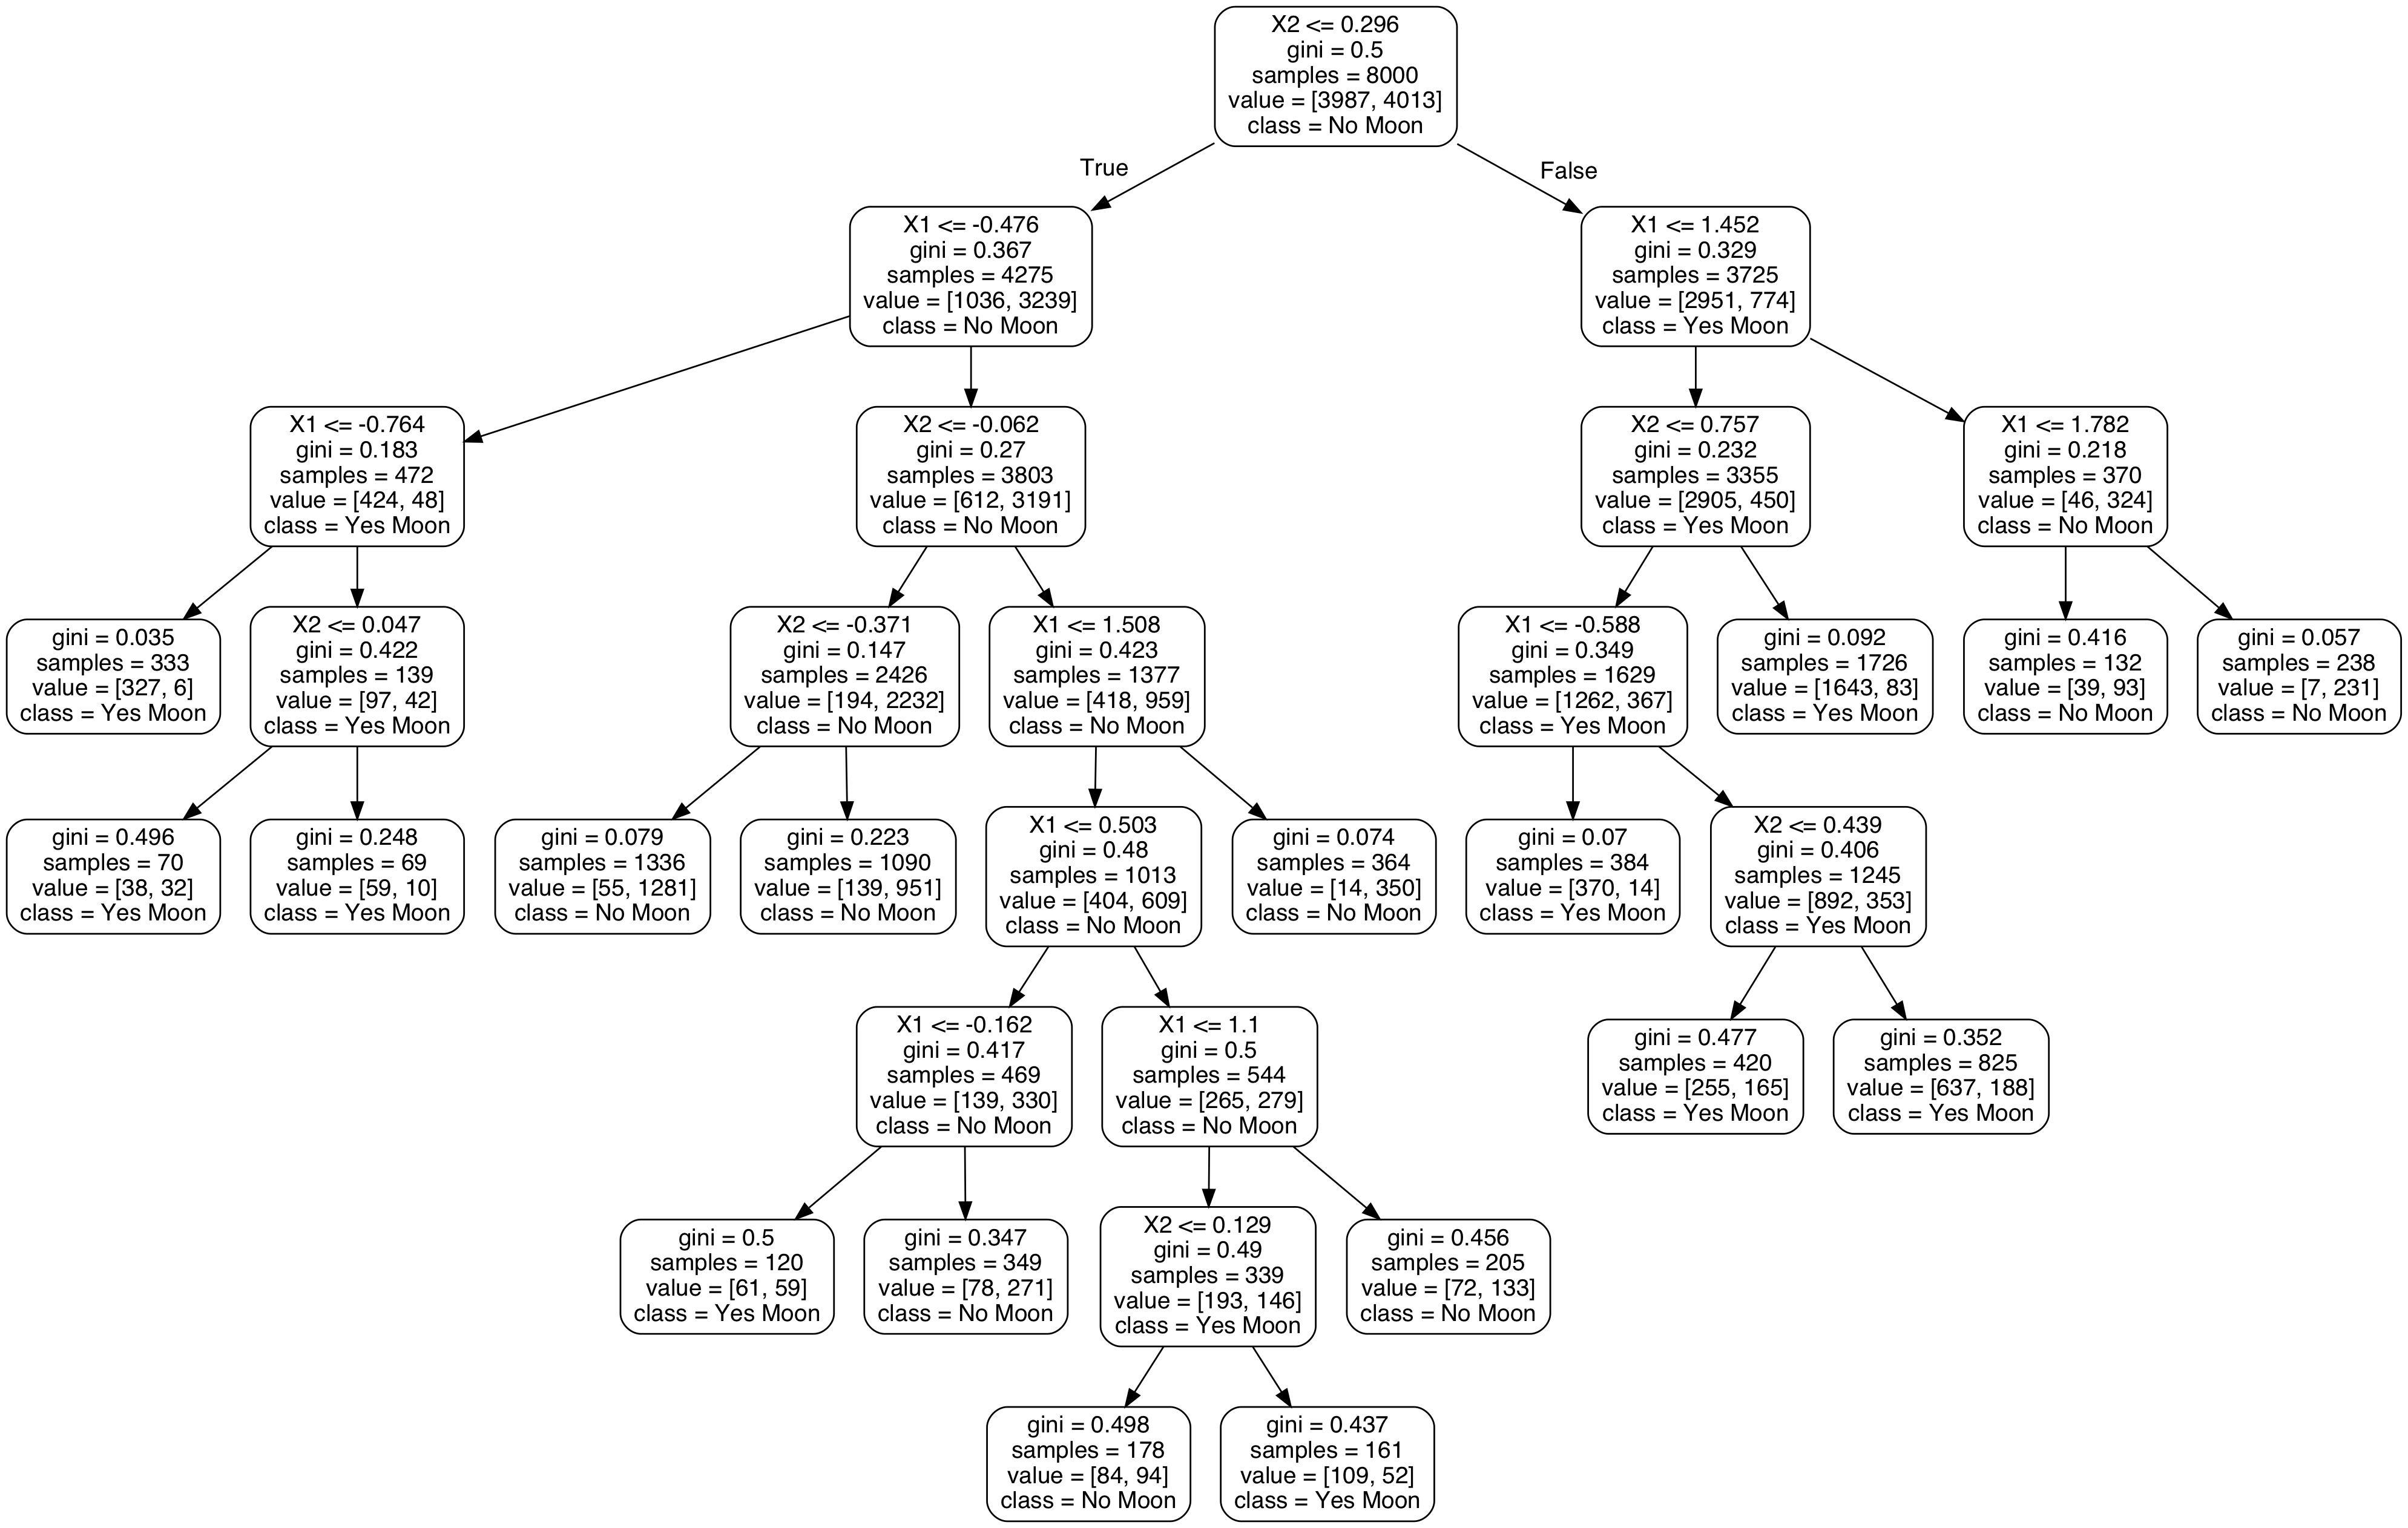

In [101]:
export_graphviz(
    tree_moon,
    out_file='tree_moon.dot',
    feature_names=['X1','X2'],
    class_names=['Yes Moon','No Moon'],
    rounded=True,
    precision=3)

call(['dot', '-Tpng', 'tree_moon.dot', '-o', 'tree_moon.png', '-Gdpi=200']);
Image('tree_moon.png',width=800,height=300)

### Grow a forest.

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing
100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for
this.

In [111]:
from sklearn.model_selection import  ShuffleSplit

n_trees = 1000
mini_sets = []

rs = ShuffleSplit(n_splits=n_trees,test_size=len(X_moon_train) - 100,random_state=42)
for mini_train_index, mini_test_index in rs.split(X_moon_train):
    X_mini_train = X_moon_train[mini_train_index]
    y_mini_train = y_moon_train[mini_train_index]
    mini_sets.append((X_mini_train,y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [116]:
from sklearn.base import clone

forest = [clone(moon_gridsearch_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []
for tree,(X_mini_train,y_mini_train) in zip(forest,mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    
    y_pred = tree.predict(X_moon_test)
    accuracy_scores.append(accuracy_score(y_moon_test, y_pred))
    
print('Mean Accuracy of the 1000 decision tree : {:.3}'.format(np.mean(accuracy_scores)))
print('Max Accuracy of the 1000 decision tree : {:.3}'.format(np.max(accuracy_scores)))
print('Min Accuracy of the 1000 decision tree : {:.3}'.format(np.min(accuracy_scores)))

Mean Accuracy of the 1000 decision tree : 0.805
Max Accuracy of the 1000 decision tree : 0.862
Min Accuracy of the 1000 decision tree : 0.715


c. Now comes the magic. For each test set instance, generate the predictions of the 1,000
Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode()
function for this). This gives you majority-vote predictions over the test set.